In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D, Flatten , Dense
from tensorflow.keras.utils import to_categorical

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [16]:
model.compile(loss='categorical_crossentropy' , optimizer='adam' , metrics='accuracy')

In [18]:
batch_size = 128
epochs = 10

history = model.fit(x_train , y_train , batch_size=batch_size , epochs=epochs , validation_data=(x_test , y_test))

Epoch 1/10
469/469 [==============================] - 25s 53ms/step - loss: 0.0231 - accuracy: 0.9928 - val_loss: 0.0418 - val_accuracy: 0.9871
Epoch 2/10
469/469 [==============================] - 25s 53ms/step - loss: 0.0174 - accuracy: 0.9946 - val_loss: 0.0281 - val_accuracy: 0.9915
Epoch 3/10
469/469 [==============================] - 24s 50ms/step - loss: 0.0140 - accuracy: 0.9955 - val_loss: 0.0404 - val_accuracy: 0.9875
Epoch 4/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0107 - accuracy: 0.9967 - val_loss: 0.0320 - val_accuracy: 0.9909
Epoch 5/10
469/469 [==============================] - 25s 54ms/step - loss: 0.0109 - accuracy: 0.9965 - val_loss: 0.0297 - val_accuracy: 0.9910
Epoch 6/10
469/469 [==============================] - 24s 52ms/step - loss: 0.0082 - accuracy: 0.9973 - val_loss: 0.0427 - val_accuracy: 0.9882
Epoch 7/10
469/469 [==============================] - 25s 54ms/step - loss: 0.0069 - accuracy: 0.9977 - val_loss: 0.0387 - val_accuracy:

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

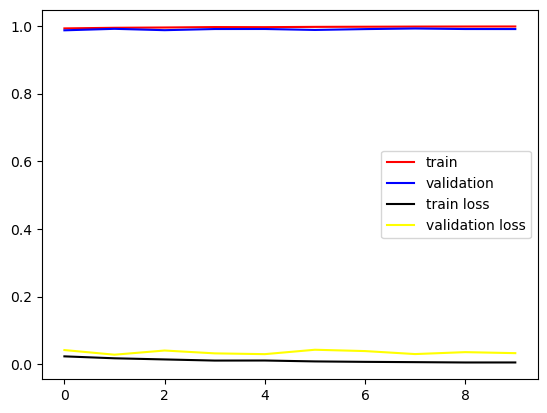

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.plot(history.history['loss'],color='black',label='train loss')
plt.plot(history.history['val_loss'],color='yellow',label='validation loss')
plt.legend()
plt.show()